<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Análise Exploratória de Dados, Exporatory Data Analysis ou EDA
---

Este é um guia prático que compila alguns conceitos e técnicas sobre EDA. Mas ele não tem a pretensão de ser o guia definitivo ou o mais completo, uma vez que, provavelmente tal coisa nunca existirá. Seja porque cada análise possui uma característica e um objetivo diferente, ou porque os dados em si possuem peculiaridades inerentes ao dataset, ou ao mercado ao qual ele pertence e por aí vai. Tudo isso para dizer que:

Vamos trabalhar com os conceitos por trás da Análise Exploratória, os motivos para fazê-la e técnicas e exemplos para você testar e explorar por sua conta e risco.


## 1. Por que fazer uma EDA nos meus dados?
---

Existe uma discussão recorrente a respeito da Análise Exploratória de Dados. O debate vai desde quão profunda deve ser essa análise, passando por questões como quão técnica e estatística ela precisa ser e em alguns casos extremos, se devemos realmente gastar nosso tempo e energia com ela.

Talvez essa visão venha do fato de que os dados ficam mais abundantes e frequentes a cada segundo. Dobramos a quantidade de dados produzidos e armazenados da humanidade a cada dois anos… bem, você já deve ter ouvido sobre isso. Mas quanto desses dados estão capturados de formato tide data? Qual a integridade e usabilidade desses dados? Imagine que no dataset do Titanic temos o número do bilhete de cada passageiro. No dataset de imóveis de Nova York temos alguns imóveis com valor de venda igual a zero. Alguns datasets demográficos apresentam códigos como 999999 no lugar do salário.

Tomar qualquer atitude em relação a esses dados de forma automática, seja ignorar, seja substituir ou mesmo excluir, sem explorar e entender o impacto das suas escolhas: você pode estar jogando fora 50% dos dados válidos e importantes, para manter o número dos apartamentos que não segue padrão algum e tem pouquíssima ou nenhuma influencia na sua previsão final.


## 2. Como fazer uma boa EDA?
---

Depende. Exato. Parece radical, pode parecer simplório, mas a verdade é que não tem uma resposta única para esta pergunta. Muitas outras perguntas devem ser feitas antes e podem te dar uma ideia do quão profundo ou quanta importância você deve dar a este processo. São elas:

- Quanto você conhece do seu dataset?

- Quanto você conhece do mercado relativo ao dataset?

- São dados recorrentes, ou é o seu primeiro contato com eles?

- Qual o seu objetivo ou entregável a partir desses dados? Um relatório? Um dashboard, um modelo preditivo?

Calma! Uma boa EDA te ajuda a responder pelo menos a primeira pergunta. Ela pode ser enriquecida com o famoso conhecimento sobre o negócio ou o mercado. Você ainda pode se beneficiar se são dados que você já viu antes. Neste caso, você poderá fazer não apenas uma análise do dataset atual, mas da evolução em diferentes períodos (mas não é o escopo deste texto). E por último, ao saber o seu objetivo/entregável, você poderá fazer escolhas durante a EDA que incluem limpeza de dados e feature engineering, ou seja, excluir dados incompletos e ruídos e imputar ou enriquecer dados que vão servir para as futuras análises. Dito tudo isso, vamos nos arriscar a criar uma definição para uma “boa” EDA desconsiderando todos estes e outros fatores que não levantamos aqui:

Uma boa EDA te dá conhecimento o suficiente para ter uma intuição sobre o dataset, sabendo quais são as features mais relevantes e as que carregam menos informações, te dá uma noção geral sobre as variáveis numéricas e categóricas, identificando padrões, relações, distribuições, dados faltantes e outliers.

## 3. Quais são as etapas de uma EDA?
---

Apesar do termo etapa, não devemos interpretar essas etapas como uma ordem ou sequência linear e cronológica a ser seguida, mas como uma forma de classificar em uma estrutura lógica de comandos dos mais simples para os mais complexos. A cada etapa, criamos perguntas que você pode buscar responder com os dados.

Imagine que você acabou de tratar os dados nulos e os outliers. Nada mais natural que você deseje entender a nova média, os novos quartis e os valores máximos e mínimos. Isso reforça o caráter cíclico dessas etapas. A cada repetição de uma etapa você pode estar buscando outro tipo de resposta para os seus dados. Por exemplo, na primeira vez em que você sumariza o dataset, pode estar buscando por outliers, ao aplicar uma estratégia para tratar esses outliers, você pode estar querendo saber como se comportam os novos dados e por aí vai… Não existe uma convenção. Não existe uma regra. Desde que as suas escolhas tenham fundamentos, elas podem e devem ser feitas.

Em outras palavras, usem este material como guia para a exploração do dataset de vocês mas caso sintam necessidade, busquem diferentes pontos de vista, outros exemplos, EDAs de datasets mais similares aos que estão analisando e novos exemplos de códigos que sirvam para ampliar o background de vocês. Feitas todas as ressalvas, vamos às etapas com seus conceitos e exemplos.

### First contact
---

Geralmente é a primeira coisa que após um pd.read_csv('arquivo.csv') esses comandos nos mostram se o dataframe está dentro do que esperamos.

**O que procurar**: buscar familiaridade, inspecionar amostras das primeiras e últimas linhas. Verificar se os nomes das colunas fazem sentido.

df.head() : Por default exibe as 5 primeiras linhas do dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('datasets/nyc-rolling-sales.csv')
ttn = pd.read_csv('datasets/Dataset_Titanic.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Logo nas primeiras linhas já conseguimos ver valores faltantes em uma feature fundamental: SALE_PRICE.

df.tail(7): Por default exibe as 5 últimas linhas, mas aceita um número como parâmetro e exibe a quantidade de linhas que desejar.

In [4]:
df.tail(7)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Não dá para afirmar ainda com tanta certeza, mas se de 12 linhas, 3 são faltantes, provavelmente vamos precisar adotar alguma estratégia a respeito desses valores faltantes. Ao mesmo tempo, não conseguimos visualizar todas as colunas. As reticências no DataFrame indicam que pelo menos uma coluna foi suprimida.

df.columns : Retorna um objeto tipo Index que lista o nome de todas as colunas do DataFrame.

In [5]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Summarization
---

São os comandos que resumem os datasets. São perfeitos para entender quantas linhas, quantas colunas e quais as medidas estatísticas de features numéricas e categóricas.

**O que procurar**: quais são os dados categóricos e os numéricos. Entender as distribuições, analisar a simetria e buscar anomalias entre as numéricas entender os dados mais frequentes entre as features categóricas.

df.shape : Por meio deste atributo você vai obter a quantidade de linhas e de colunas do dataset. Pense que isso pode ser útil não apenas para obter uma informação inicial, mas para comparar o novo formato dos dados após operações que vão eliminar, ou dropar, linhas e colunas.

In [6]:
df.shape

(84548, 22)

df.info(): Ao chamar esse método, você vai ter um resumo completo do dataset: quantas linhas, quantas colunas, quais os nomes das colunas, qual o tipo de dados temos em cada coluna e quantos dados não-nulos temos em cada coluna, ou seja, quantos dados faltantes temos em cada coluna.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.describe() : Esse método cria um sumário estatístico de features numéricas do dataset com número máximo, mínimo, média, desvio padrão, quartis e contagem de valores não-nulos em cada coluna. Vale lembrar que esse método ignora valores nulos, o que pode ocasionar em diferenças significativas antes e depois de alguns tratamentos.

In [9]:
ttn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
ttn.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


df.describe(include=np.object) : As vezes temos features categóricas como Pclass e Survived que estão representadas por números e serão interpretadas pelo método describe. Mas mesmo quando as features não são numéricas, podemos forçar o pandas a analisar features não numéricas com o parâmetro (include=np.object) note que o sumário não muda e passa a nos fornecer informações como a quantidade de linhas com valores não nulos, quantos valores únicos temos em cada coluna, o valor que mais se repete e quantas vezes ele aparece no dataset.

In [11]:
ttn.describe(include=np.object_)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yousseff, Mr. Gerious",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Valores Nulos
---

Saber identificar e tratar os valores nulos de um dataset é uma habilidade inestimável. Às vezes, como no dataset de treino do Titanic, os valores nulos estão visíveis. Mas nem sempre é assim. Algumas vezes os valores nulos estão representados por “0”, “-” ou algum outro caractere que vai passar a impressão de o dataset está bem mais completo do que a realidade.

**O que procurar**: o que é o dado faltante, como lidar com os zeros, técnicas para lidar com dados nulos e zeros.

In [12]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [13]:
ttn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Para tratar valores nulos, basicamente temos 2 estratégias:
---

**Excluir linhas ou colunas que tenham os dados faltantes**
Quase sempre esta estratégia é a menos recomendadas. Ela implica na perda de dados do dataset e deve ser feita somente se for muito arriscado usar estratégias de preenchimento de dados, ou quando você deseja fazer um modelo inicial sem tratamento e compará-lo a um com os tratamentos de dados adequados.

df.dropna(*axis=0, how=’any’, thresh=None, subset=None, inplace=False*)

Estes kargs são o default do método .dropna() ele exclui todas as linhas que tiverem algum dado faltante, sem limites de linhas, sem se basear em uma coluna, mas ele não substitui o dataset original. No caso do dataset do Titanic vamos excluir a coluna Cabin:

In [14]:
ttn.dropna(axis=1, thresh=177, inplace=True)
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Imputar ou preencher os dados faltantes
---

Podemos imputar dados de forma manual, simples e múltiplas, regressão e classificação.

As imputações de dados múltipla, por regressão e por classificação envolvem o uso de Machine Learning por isso não vamos abordar agora. No final do texto você pode encontrar mais informações e exemplos, embora não seja recomendado que se preocupe com esses assuntos até pelo menos abordarmos os conceitos de Aprendizado Supervisionado e Não-Supervisionado.

### Imputação manual:
df.fillna() : Basicamente vai substituir os nulos do dataset pelo valor que passar como argumento. Uma escolha não muito sábia seria substituir os nulos por zeros. No caso de Embarked, por exemplo, temos apenas duas linhas com esse dado faltante. Podemos um filtro muito específico para inferir em qual porto essas duas pessoas embarcaram.

In [15]:
ttn[ttn['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
ttn.loc[(ttn['Survived'] == 1)&(ttn['Pclass'] == 1)&(ttn['Sex'] == 'female')&(ttn['Age'] > 37), 'Embarked'].value_counts()

C    18
S    14
Name: Embarked, dtype: int64

Substituímos os valores nulos de Embarked por ‘C’ e agora não temos mais nenhuma linha vazia nessa coluna.

In [17]:
ttn['Embarked'].fillna('C', inplace=True)
ttn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Imputação simples:

Mas nem sempre é possível ou prático fazer uma imputação tão artesanal. Por isso usamos a estatística. Vamos investigar um pouco mais as linhas que estão vazias na coluna idade.

In [18]:
ttn[ttn['Age'].isna()]['Sex'].value_counts(normalize=True)

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [19]:
ttn[ttn['Age'].isna()]['Survived'].value_counts(normalize=True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [20]:
print('mediana de idade para sobreviventes masculino: ', ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex']=='male'),'Age'].median())
print('mediana de idade para sobreviventes feminina: ', ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex']=='female'),'Age'].median())

print('mediana de idade para não-sobreviventes masculino: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='male'),'Age'].median())
print('mediana de idade para não-sobreviventes feminina: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='female'),'Age'].median())

mediana de idade para sobreviventes masculino:  28.0
mediana de idade para sobreviventes feminina:  28.0
mediana de idade para não-sobreviventes masculino:  29.0
mediana de idade para não-sobreviventes feminina:  24.5


In [21]:
print('média de idade para sobreviventes masculino: ', ttn.loc[(ttn['Survived']==1)&(ttn['Sex']=='male'),'Age'].mean())
print('média de idade para sobreviventes feminina: ', ttn.loc[(ttn['Survived']==1)&(ttn['Sex']=='female'),'Age'].mean())

print('média de idade para não-sobreviventes masculino: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='male'),'Age'].mean())
print('média de idade para não-sobreviventes feminina: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='female'),'Age'].mean())

média de idade para sobreviventes masculino:  27.276021505376345
média de idade para sobreviventes feminina:  28.84771573604061
média de idade para não-sobreviventes masculino:  31.618055555555557
média de idade para não-sobreviventes feminina:  25.046875


Poderíamos escolher algo simples como substituir todos os valores faltantes da coluna por sua média ou mediana com um código simples como: df['coluna'].fillna(df['coluna'].median(), inplace=True)

Mas ao invés disso, vamos imputar os dados em 4 diferentes grupos usando duas medidas estatísticas diferentes.

In [22]:
# Antes
ttn['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
#Armazenando o valor desejado em uma variável: Mediana para os sobreviventes
male_surv_median = ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex'] == 'male'),'Age'].median()

#Selecionar a coluna que vai receber os valores e especificar as condições = coluna.fillna(variável)
ttn['Age'][ttn['Survived'] == 1][ttn['Sex'] == 'male'] = ttn['Age'].fillna(male_surv_median);

female_surv_median = ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex'] == 'female'),'Age'].median()
ttn['Age'][ttn['Survived'] == 1][ttn['Sex'] == 'female'] = ttn['Age'].fillna(female_surv_median);

#Armazenando o valor desejado em uma variável: Média para os não sobreviventes
male_non_surv_median = round(ttn.loc[(ttn['Survived'] == 0)&(ttn['Sex'] == 'male'),'Age'].mean())
ttn['Age'][ttn['Survived'] == 0][ttn['Sex'] == 'male'] = ttn['Age'].fillna(male_non_surv_median, inplace=True);

female_non_surv_median = round(ttn.loc[(ttn['Survived'] == 0)&(ttn['Sex'] == 'female'),'Age'].mean())
ttn['Age'][ttn['Survived'] == 0][ttn['Sex'] == 'female'] = ttn['Age'].fillna(female_non_surv_median, inplace=True);

Vejam o impacto das mudanças no dataset:

In [24]:
# Depois
ttn['Age'].describe()

count    891.000000
mean      30.156195
std       13.034420
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Inspecionando valores nas colunas
---

Uma das melhores formas de saber se está tudo certo com os dados de uma coluna é investigando seus valores. Assim podemos entender quais os valores únicos, quantos são, identificar possíveis erros de digitação, verificar se existem colunas com espaços vazios “ ”, “-”, números repetidos ou negativos que podem ser códigos, e por aí vai.

O que procurar: erros de digitação, variáveis categóricas, quantidade de valores diferentes, vale a pena estratificar o dado?

Lembra do dataset df??? Vamos entender porque aparece como se não tivesse nenhum dado faltante.

df['coluna'].unique() : Retorna um arranjo numpy com todos os valores de uma coluna e o tipo de dados da coluna.

In [25]:
df['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

Felizmente, nesse caso, conseguimos matar dois coelhos com uma linha de código só… ok, vamos precisar de mais uma para exibir o resultado.

In [26]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE PRICE'].unique()

array([ 6625000.,       nan,  3936272., ...,   408092., 11693337.,
          69300.])

Mas quando o dado é categórico, não temos essa opção.

In [27]:
df['TAX CLASS AT PRESENT'].sort_values().unique()

array([' ', '1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '3', '4'],
      dtype=object)

In [28]:
df['TAX CLASS AT PRESENT'].sort_values().value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

Para transformar “ ” em np.nan, usamos o método .replace()

df['column'] = df['column'].replace(' ', np.nan)

Podemos investigar a quantidade de valores únicos em um dataset ou em uma coluna através do método .nunique() :

In [29]:
df.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

## Identificando, verificando e tratando outliers
---

Alguns dados se distanciam tanto da maioria dos dataset que tornam muito difícil uma análise sobre o comportamento dos dados. Esses são os outliers. Ainda bem que com pandas, python e alguns tipos de gráficos fica muito mais fácil reconhecer e fazer escolhas para tratar esses dados.

Uma das principais e mais poderosas ferramentas para nos ajudar a identificar outliers é o boxplot. Ele identifica:

- Mínimo — menor valor dentro do critério de seleção de outliers;

- Q1(primeiro quartil) — Separa os 25% valores inferiores dos 75% superiores;

- Q2 (segundo quartil) — Separa os 50% valores inferiores dos 50% superiores (Q2 = mediana);

- Q3 (terceiro quartil) — Separa os 75% valores inferiores dos 25% superiores;

- Máximo — maior valor dentro do critério de seleção de outliers.

Sua representação gráfica é assim:

<img src = "https://images2.imgbox.com/e9/4f/jPKII6xm_o.png" width="900">


Agora vamos ver o boxplot em ação! Vamos investigar os preços dos imóveis pelas 5 regiões de Nova York.

sns.boxplot(x=’dado_categórico’, y=’dados_numérico’, data=df)

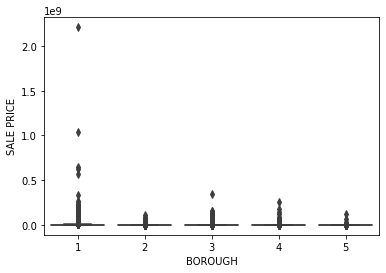

In [30]:
#esse é o código básico para o boxplot com seaborn (as sns)
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.show()

### Substituindo os códigos dos burgos por seus nomes 

In [31]:
df['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}, inplace=True)

### Quantos imóveis existem com valor acima de US$100.000.000,00?

In [32]:
print('Manhattan:', len(df[(df.BOROUGH == 'Manhattan') & (df['SALE PRICE'] > 100000000)]), end='\n')
print('Bronx:', len(df[(df.BOROUGH == 'Bronx') & (df['SALE PRICE'] > 100000000)]), end='\n')
print('Brooklyn:', len(df[(df.BOROUGH == 'Brooklyn') & (df['SALE PRICE'] > 100000000)]), end='\n')
print('Quenns:', len(df[(df.BOROUGH == 'Quenns') & (df['SALE PRICE'] > 100000000)]), end='\n')
print('Staten Island:', len(df[(df.BOROUGH == 'Staten Island') & (df['SALE PRICE'] > 100000000)]), end='\n')

Manhattan: 35
Bronx: 1
Brooklyn: 7
Quenns: 0
Staten Island: 1


Vamos aproveitar este questionamento para entrar um pouco no assunto da próxima etapa (Agrupamentos e seleções), reforçando o caráter cíclico e não linear das etapas de EDA, que falávamos no início deste texto. Vamos usar a técnica de agrupar valores semelhantes entre si, filtrando e subdividindo o dataset.

Criamos dois subdatasets (ny_lowbud & ny_highbud) com o recorte em U$ 5 Milhões. Vamos ver como eles se comportam:

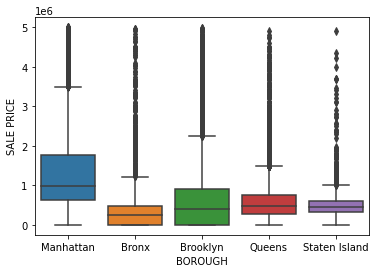

In [33]:
ny_lowbud = df[df['SALE PRICE'] < 5000000]
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=ny_lowbud)
plt.show()

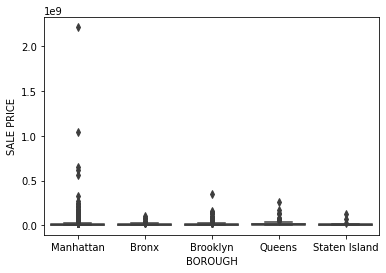

In [34]:
ny_highbud = df[df['SALE PRICE'] > 5000000]
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=ny_highbud)
plt.show()

Imóveis com valor muito baixo ou zero não necessariamente estão errados. Podem ser fruto de herança, dívidas, ações e doações. Mas para nosso estudo sobre o comportamento dos preços nas regiões, ele certamente enviesa os valores para baixo. Ao mesmo tempo, o nosso recorte ainda não parece ser eficiente para tratar os, vamos dizer, “ultra outliers”. A nossa resposta em ambos os casos é criar um novo recorte que limite os valores muito baixos ou extremamente altos. Escolhi valores de forma semi-arbitrária, testando o que retornava uma informação visual mais consistente.

Lowbudget_ltde : > 20

Highbudget_ltde : < 35.000.000

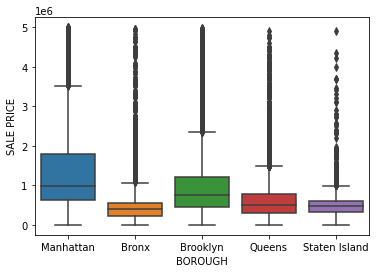

In [35]:
#Vamos criar um recorte para os nossos dados excluindo valores acima de 5MM e abaixo de 20
ny_lowbud_ltde = df[(df['SALE PRICE'] > 20) & (df['SALE PRICE'] < 5000000)]
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=ny_lowbud_ltde)
plt.show()

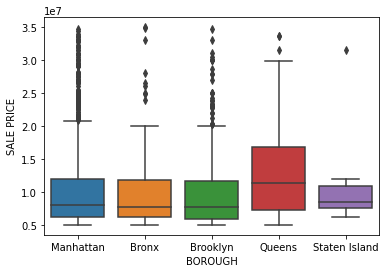

In [36]:
ny_highbud_ltde = df[(df['SALE PRICE'] > 5000000) & (df['SALE PRICE'] < 35000000)]
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=ny_highbud_ltde)
plt.show()

## Agrupamentos e seleções
---

Já vimos um pouco do poder de agrupar e selecionar dados. Agora vamos conhecer algumas técnicas e ferramentas para elevar a profundidade e o nível das suas análises.

Por que fazer: aprofundar o conhecimento, combinar variáveis, gerar insights, levantar hipóteses a serem comprovadas estatisticamente.

Uma das formas mais comuns por ser rápida e direta é selecionar as colunas que deseja investigar passando uma lista dentro do df e usando o método .groupby() . Note que esse método exige uma função agregadora como .mean() , .median() e outras. Mas é possível passar uma ou mais agregação em uma lista dentro de .agg(['lista de agregações']).

df[['lista de colunas']].groupby(['col1', 'col2']).agg(['agg1', 'agg2'])

In [37]:
# Selecionar as colunas do dataset :: selecionar as colunas para agrupar :: passar as formas de agregar os valores
ttn[['Survived', 'Pclass', 'Age']].groupby(['Survived', 'Pclass']).agg(['min', 'mean', 'median', 'max']).round()

Age                   
                  min  mean median   max
Survived Pclass                         
0        1        2.0  41.0   38.0  71.0
         2       16.0  33.0   32.0  70.0
         3        1.0  28.0   31.0  74.0
1        1        1.0  35.0   34.0  80.0
         2        1.0  26.0   28.0  62.0
         3        0.0  24.0   27.0  63.0

Às vezes, estratificar ou criar categorias nos ajuda a entender melhor o nosso conjunto dos dados. Quando falamos de idades por exemplo, separar as idades por rótulos pode simplificar e nos ajudar a entender melhor a composição de cada classe de acordo com sua idade:

- Babies: 0 à 3 anos;
- Children: 4 à 12 anos;
- Teen: 13 à 18 anos;
- Adult: 19 à 35 anos;
- MidAge: 36 à 60 anos;
- Senior: 61 + anos.

Eu poderia fazer isso através de um loop iterando por todas as linhas da coluna Age, mas aí perderia a oportunidade de apresentar o pd.cut() que faz algo semelhante com muito menos linhas de código.

In [38]:
#vamos criar os limites das faixas etárias para os nossos dados  
age_cat_edges = [0, 3, 12, 18, 35, 60, 1000]
#crie uma nova coluna :: selecione a coluna base
ttn['age_cat'] = pd.cut(ttn['Age'], 
                             
                             #aplique os limites de cada categoria
                             age_cat_edges, 
                             #nomei cada categoria
                             labels=['Babies','Children','Teen',
                                     'Adult','MidAge','Senior'])

Para visualizar, vamos usar uma técnica mais poderosa que o groupby. Com vocês o pd.pivot_table(). Com ele é possível dar um reshape nos dados usando os valores e reagrupando por índices e colunas. Ainda é possível passar diversas agregações e habilitar margens com os totais das linhas e colunas. Vamos ver um exemplo:

In [39]:
pd.pivot_table(ttn, values=['Survived'],
                    index=['Sex', 'age_cat'], columns=['Pclass'],
                    aggfunc='count', margins=True)

Survived               
Pclass                 1    2    3  All
Sex    age_cat                         
female Babies          1    2    9   12
       Children        0    6   14   20
       Teen           10    6   20   36
       Adult          45   42   86  173
       MidAge         36   20   14   70
       Senior          2    0    1    3
male   Babies          1    8    9   18
       Children        2    1   16   19
       Teen            2    6   26   34
       Adult          51   63  248  362
       MidAge         54   27   44  125
       Senior         12    3    4   19
All                  216  184  491  891

Poderoso, né?! As pivot tables são muito flexíveis e essa é apenas uma demonstração do que elas podem fazer. Só que quando o assunto é percentual, as crosstabs aceita o argumento ‘normalize’ que pode transformar todo os os dados em percentual. Recriei a pivot table anterior com o comando pd.crosstab() . Perceba que eu apliquei o atributo .T para transpor a tabela. Guarde este atributo ele pode ser aplicado em vários outros métodos e funções como o .describe(), por exemplo. Agora vamos à nossa crosstab:



In [40]:
pd.crosstab(index=[ttn['Pclass']], columns=[ttn['Sex'], ttn['age_cat']], normalize=True).T

Pclass                  1         2         3
Sex    age_cat                               
female Babies    0.001122  0.002245  0.010101
       Children  0.000000  0.006734  0.015713
       Teen      0.011223  0.006734  0.022447
       Adult     0.050505  0.047138  0.096521
       MidAge    0.040404  0.022447  0.015713
       Senior    0.002245  0.000000  0.001122
male   Babies    0.001122  0.008979  0.010101
       Children  0.002245  0.001122  0.017957
       Teen      0.002245  0.006734  0.029181
       Adult     0.057239  0.070707  0.278339
       MidAge    0.060606  0.030303  0.049383
       Senior    0.013468  0.003367  0.004489

Esses valores já nos dizem muito, mas e se pudéssemos acrescentar cores às células, tornando tudo ainda mais visível? Felizmente podemos fazer isso. Vamos chamar um mapa de calor do pacote seaborn e englobar nossa crosstab. Para fins comparativos, vamos acrescentar a coluna Survived e compara os resultados. sns.heatmap(pd.crosstab(parâmetros vão aqui))

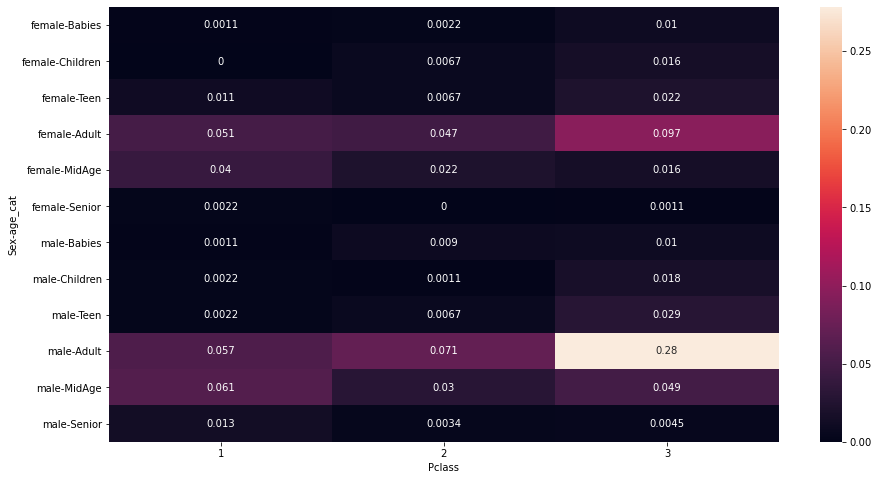

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pd.crosstab(index=[ttn['Pclass']], columns=[ttn['Sex'], ttn['age_cat']], normalize=True).T, annot=True)
plt.show()

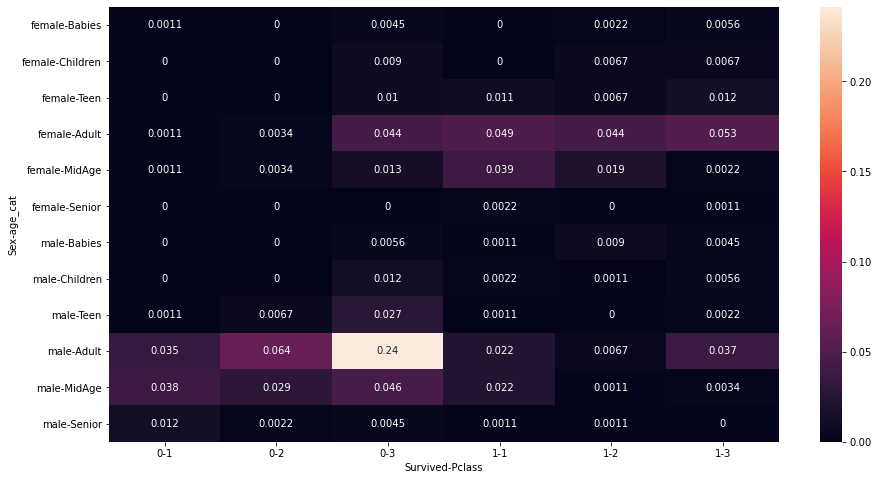

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pd.crosstab(index=[ttn['Survived'], ttn['Pclass']], columns=[ttn['Sex'], 
                                                                         ttn['age_cat']], normalize=True).T, annot=True)
plt.show()

## Relações e distribuições
---

Quando estamos investigando um dataset, algumas ferramentas vão servir de atalhos e gatilhos visuais poderosos para guiar as nossas análises.

O que procurar: padrões de distribuição de uma variável, padrões de covariância entre duas ou mais variáveis

plt.hist() : Pode ser usado tanto para inspecionar uma única coluna quanto várias, desde que sejam numéricas ou categóricas transformadas em números.

<Figure size 432x288 with 0 Axes>

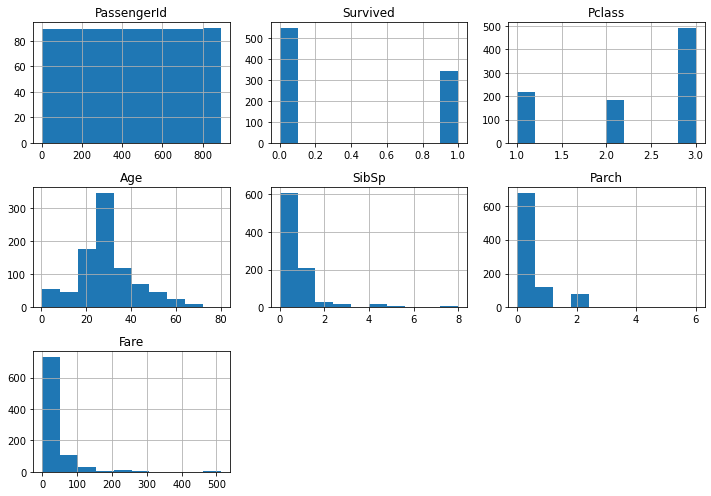

In [43]:
plt.clf()
ttn.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()

sns.density() : Quando o dataset possui muito dados, pode ser mais eficiente usar o density plot para explorar. Isso porque ele não usa o conceito de número de bins, que pode enviesar a nossa interpretação. O density plot usa o conceito de densidade dos dados para criar uma linha desenhada sobre bins, dando muito mais precisão e intuição às nossas interpretações.

No exemplo, temos 2 momentos antes e depois do tratamento sobre a feature Year Built com histograma e distplot.

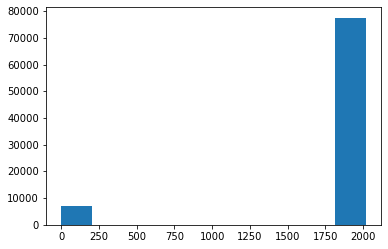

In [44]:
fig, ax = plt.subplots()
ax.hist(df['YEAR BUILT'])
plt.show()

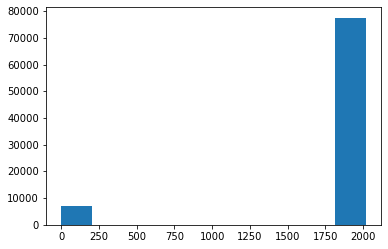

In [45]:
ax = plt.hist(df['YEAR BUILT'])
plt.show()

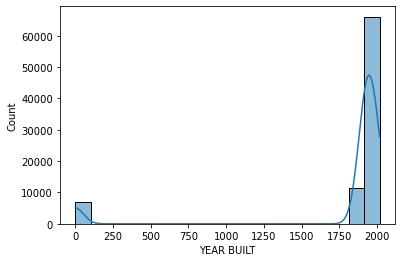

In [46]:
ax = sns.histplot(df['YEAR BUILT'], kde=True, bins=20)
plt.show()

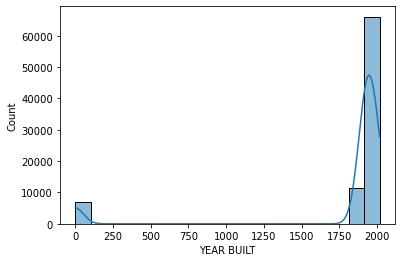

In [47]:
ax = sns.histplot(df['YEAR BUILT'], kde=True, bins=20)
plt.show()

plt.scatter() : O gráfico de dispersão ou scatter plot, nos mostrar os dados relacionando graficamente duas colunas e como elas interagem sobre si.

Perceba a relação entre o preço das tarifas e as idades.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

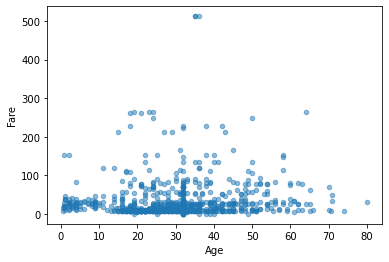

In [48]:
ttn.plot('Age', 'Fare', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

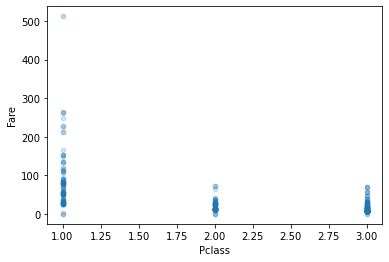

In [49]:
ttn.plot('Pclass', 'Fare', kind='scatter', alpha=0.1)

Veja que o range de valores entre as tarifas da segunda e da terceria classe não eram tão diferentes. Mas podemos perceber uma concentração maior próxima ao mínimo na terceira. Já na segunda, essa concentração é um pouco acima.

## Correlações
---

A correlação linear de Pearson captura a associação entre duas variáveis e nos dá uma leitura simples da relação entre elas. Vocês já devem ter ouvido, mas é sempre bom repetir: correlação não implica causalidade. Isso quer dizer que quando fazemos um teste estatístico, aquela correlação pode ser mero acaso, coincidência ou irrelevante. Digamos que as correlações são como fumaça: pode haver fogo ou pode ser um alarme falso. Mas pela simplicidade e facilidade de fazê-la, pode te ajudar a entender o dataset e levantar mais hipóteses.

É sempre importante ter em mente o que esse termo quer dizer. Não estamos falando se duas variáveis independentes tem alguma relação, mas sim, se elas possuem uma correlação linear de Pearson. Não vou entrar no cálculo, mas valores próximos à 1 ou a -1 indicam correlação linear positiva ou negativa. Valores próximos a zero indicam ausência deste tipo de relação. Vale ressaltar que existem correlações não-lineares. A imagem abaixo nos lembra disso.

df.corr() : Devolve uma crosstab com as correlações lineares de todas as features numéricas.

In [50]:
ttn.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.32,0.08,0.02,-0.55
Age,0.03,-0.08,-0.32,1.00,-0.23,-0.19,0.08
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.08,0.16,0.22,1.00


sns.heatmap() : Opa! você disse crosstab? Se tem crosstab, também tem heatmap. Podemos aplicar um heatmap para melhorar a nossa visualização das correlações.

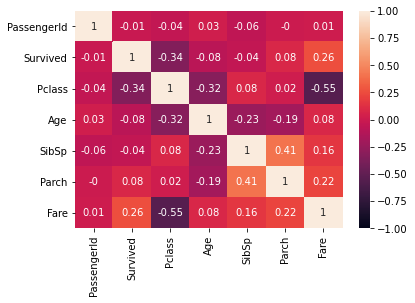

In [51]:
sns.heatmap(ttn.corr().round(2), annot=True, vmin=-1, vmax=1);

As próximas duas etapas possuem um caráter mais automático e por vezes, elas podem ser feitas no início da EDA. Mas fica o alerta de que elas são muito custosas em termos computacionais e podem ser muito mais eficientes depois de pelo menos um tratamento inicial.

## PairPlot
---

E se fosse possível com um só comando visualizar as relações e distribuições entre de todas as variáveis do dataset em uma matriz? É exatamente isso o que faz o Pair Plot da biblioteca Seaborn.

Essa função cria uma espécie de sumário visual de seus dados. Plotando todos contra todos em um scatter plot e na diagonal das features com elas mesmas, ela exibe um gráfico de distribuição ou um histograma.

sns.pairplot(df) : Essa forma automática nos dá uma visualização imediata sobre todas as features do dataset.

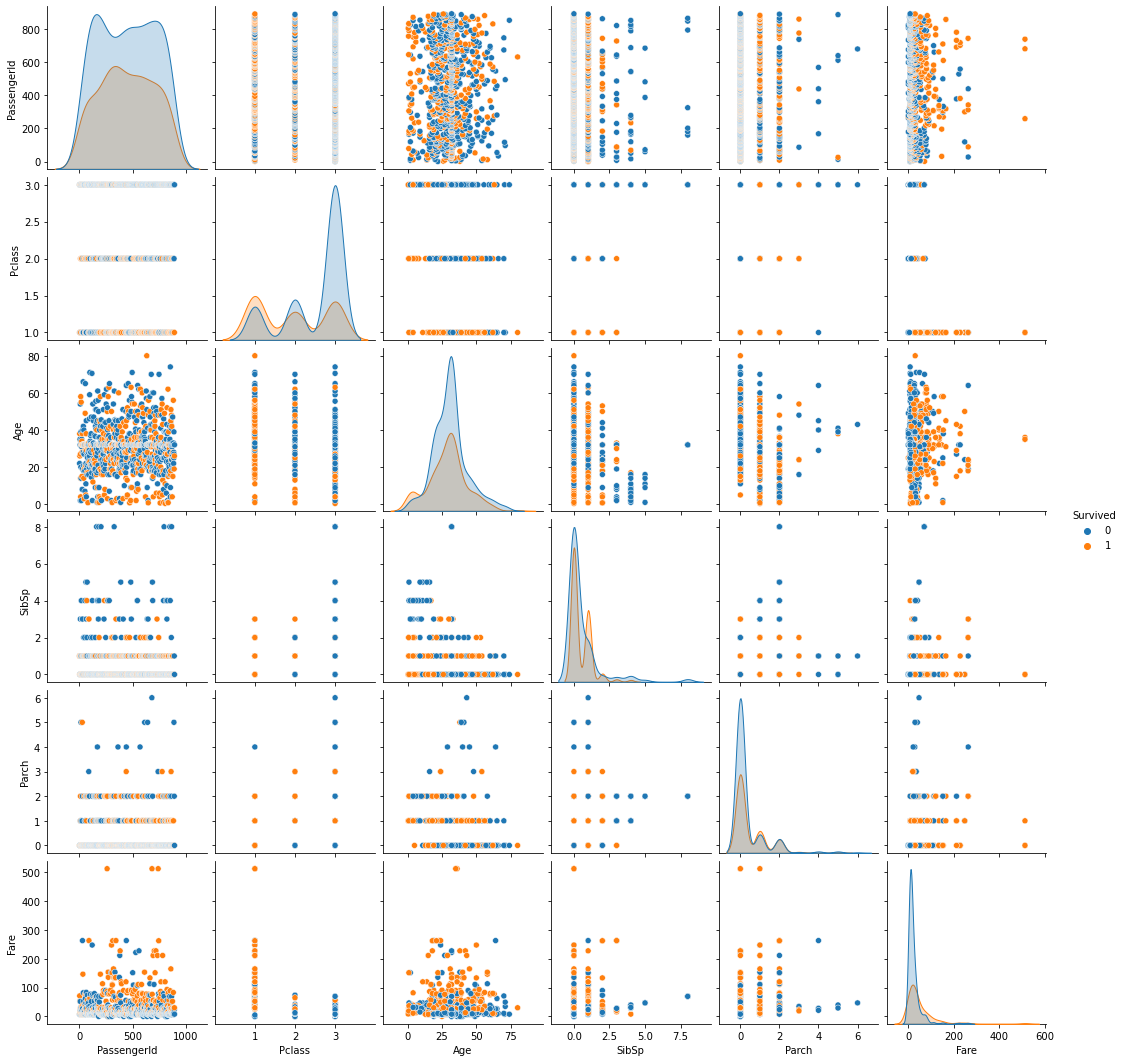

In [52]:
sns_plot= sns.pairplot(ttn, hue='Survived', diag_kind='kde')

## Pandas profiling
---

Agora é hora da verdadeira bruxaria. Uma análise detalhada que inspeciona todas as linhas e colunas, fazendo alertas e tudo o mais. Mas tudo isso vem com um enorme custo computacional. Então cuidado. Use com sabedoria.

In [53]:
%pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: confuse>=1.0.0 in c:\users\dsc70\anaconda3\lib\site-packages (from pandas-profiling) (1.7.0)



In [54]:
from pandas_profiling import ProfileReport

In [55]:
profile = ProfileReport(df, title='Titanic Dataset')

In [56]:
profile.to_file('Titanic_Inicial.html')

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\dsc70\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\dsc70\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

O Pandas Profiling faz uma análise detalhada sobre os valores de cada coluna distinguindo features que são categórica das numéricas, quais são os valores mais frequentes plota histogramas das distribuições, cria um scatter plot interativo para as features categóricas e exibe até um drendrograma com as features faltantes. Eu poderia continuar falando, mas é melhor verificar um vídeo com o overview de como é o relatório gerado.

## Conclusão
---

Espero que tenham aproveitado essa jornada. Tentamos mesclar conteúdos e códigos mais básicos, com conceitos e linhas de código mais elaboradas.

Após este artigo, esperamos que esteja mais preparado para fazer uma EDA em cada novo dataset que tiver a oportunidade de abrir. Lembre-se:

- **Por que fazer uma EDA?**
Para ter uma visão geral e ter insights enquanto investiga e trata problemas do dataset.

- **Como fazer uma EDA?**
É muito relativo, mas de maneira geral, entendendo as distribuições e relações, descobrindo e tratando valores faltantes e outliers.

- **Quais as etapas de uma EDA?**
First contact | Sumarização | Valores Nulos | Outliers | Agrupamentos |
Distribuições | Relações | Visualizações e Relatórios automatizados

Vamos ficando por aqui, mas se tiver qualquer dúvida sobre os códigos ou os conceitos trabalhados aqui, não exitem em entrar em contato com o time Tera!